En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_imagen = '/content/drive/MyDrive/Colab Notebooks/Tecnicas de Procesamiento de Imagenes/imagen1.jpg'

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

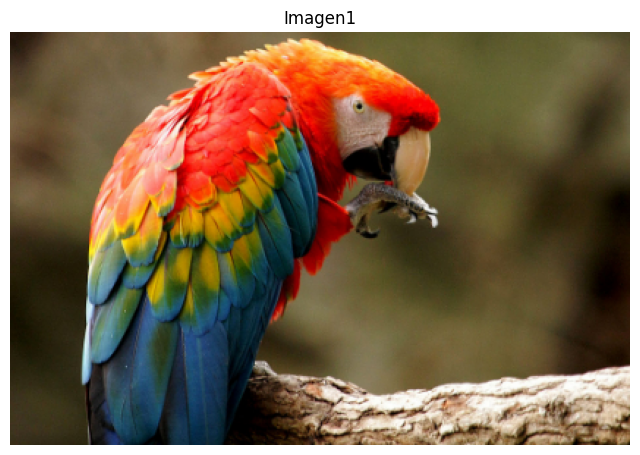

In [ ]:
# Lee la imagen en formato BGR
imagen_bgr = cv2.imread(ruta_imagen)

# Convierte la imagen de BGR a RGB
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Muestra la imagen (pasos del ejercicio anterior)
plt.figure(figsize=(8, 6))
plt.imshow(imagen_rgb)
plt.title('Imagen1')
plt.axis('off')
plt.show()

##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

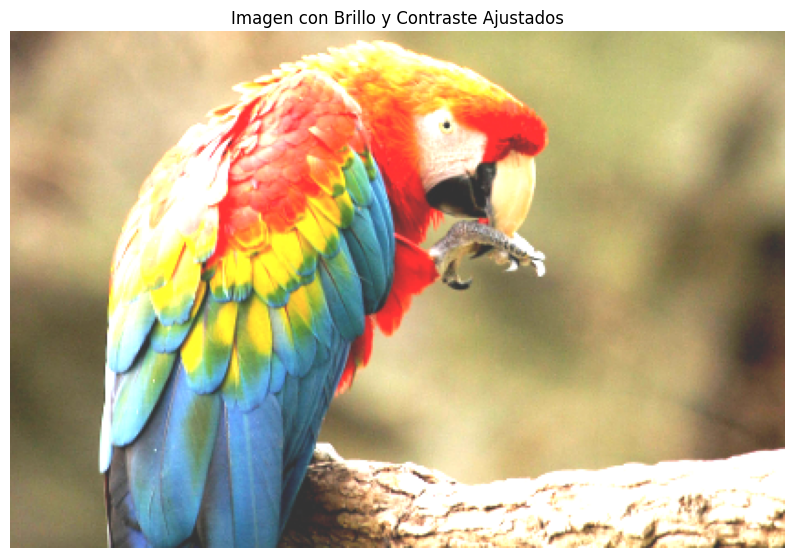

In [ ]:
def ajustar_brillo_contraste(imagen, alpha, beta):
    # Usa cv2.addWeighted para aplicar el ajuste
    # El valor de gamma se deja en 0
    return cv2.addWeighted(imagen, alpha, imagen, 0, beta)

# Aplica el ajuste de brillo y contraste
# Por ejemplo: alpha=1.5 (más contraste), beta=50 (más brillo)
imagen_ajustada = ajustar_brillo_contraste(imagen_rgb, alpha=1.5, beta=50)

# Muestra la imagen con el ajuste aplicado
plt.figure(figsize=(10, 8))
plt.imshow(imagen_ajustada)
plt.title('Imagen con Brillo y Contraste Ajustados')
plt.axis('off')
plt.show()

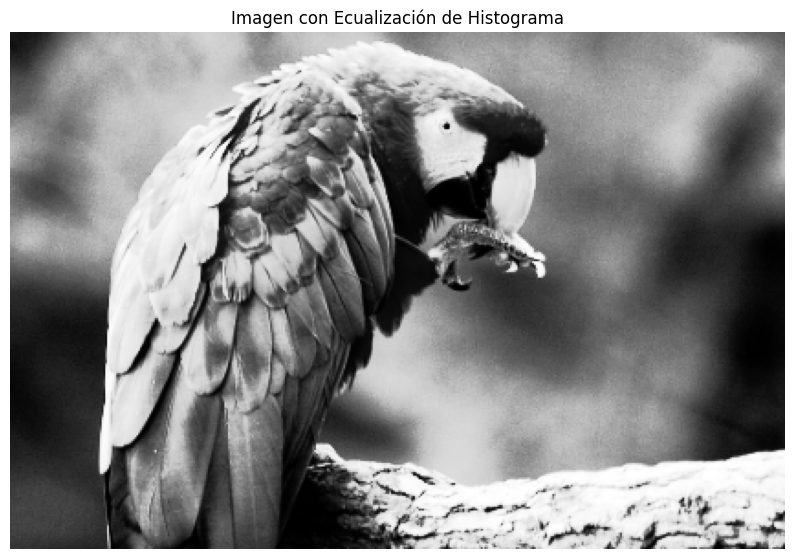

In [ ]:
# Convierte la imagen original a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2GRAY)

# Aplica la ecualización del histograma
imagen_ecualizada = cv2.equalizeHist(imagen_gris)

# Muestra el resultado
plt.figure(figsize=(10, 8))
plt.imshow(imagen_ecualizada, cmap='gray') # Usamos 'gray' para mostrar la imagen en escala de grises
plt.title('Imagen con Ecualización de Histograma')
plt.axis('off')
plt.show()

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

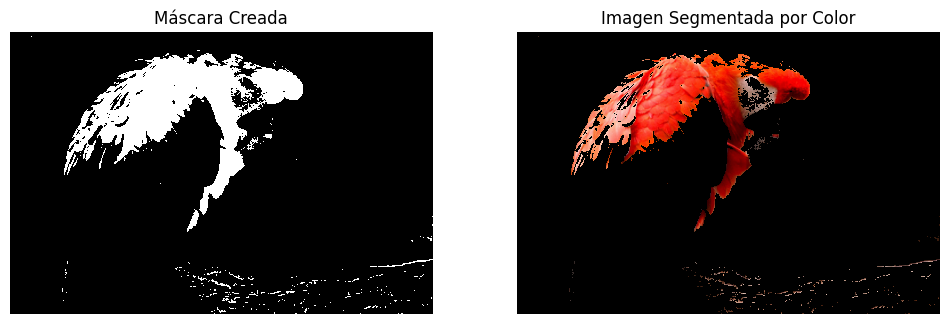

In [ ]:
# Convierte la imagen de RGB a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

# Define los rangos de color para el rojo
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([179, 255, 255])

# Crea las máscaras para cada rango de rojo
mask1 = cv2.inRange(imagen_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(imagen_hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Aplica la máscara a la imagen original RGB
imagen_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask)

# Muestra los resultados para visualizar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Máscara Creada')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)
plt.title('Imagen Segmentada por Color')
plt.axis('off')
plt.show()

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

In [ ]:
# Encontrar contornos en la máscara binaria
# cv2.findContours modifica la máscara, así que creamos una copia
mask_copy = mask.copy()
# RETR_EXTERNAL recupera solo los contornos externos (no los contornos dentro de otros)
# CHAIN_APPROX_SIMPLE almacena solo los puntos finales de los contornos
contours, _ = cv2.findContours(mask_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Dibujar rectángulos y agregar texto
# Creamos una copia de la imagen segmentada para dibujar sobre ella
imagen_con_rectangulos = imagen_rgb.copy()

for contour in contours:
    # Ignoramos contornos muy pequeños, que podrían ser ruido
    if cv2.contourArea(contour) > 500:
        # Obtener las coordenadas del rectángulo delimitador
        x, y, w, h = cv2.boundingRect(contour)

        # Dibujar el rectángulo sobre la imagen_con_rectangulos
        # Los parámetros son: imagen, punto superior izquierdo, punto inferior derecho, color (en RGB), grosor
        cv2.rectangle(imagen_con_rectangulos, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Agregar texto
        # Los parámetros son: imagen, texto, posición, fuente, tamaño de fuente, color (en RGB), grosor
        cv2.putText(imagen_con_rectangulos, 'Objeto Segmentado', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

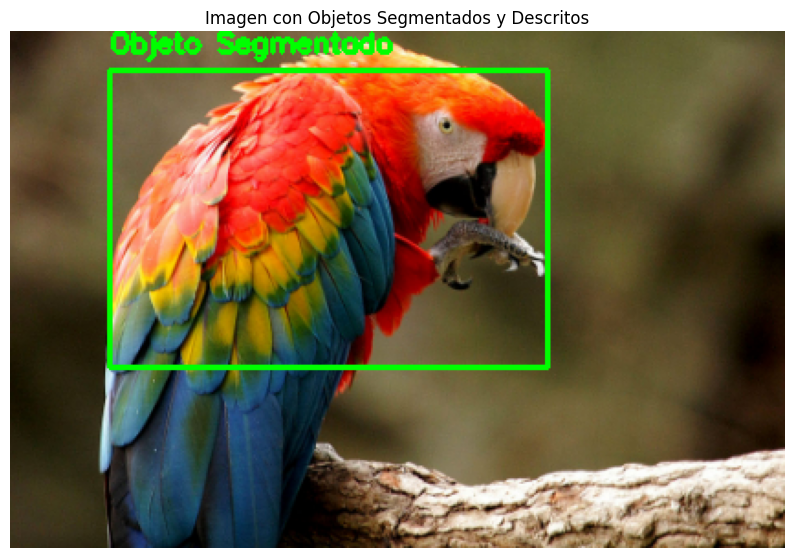

In [ ]:
# Mostrar el resultado final
plt.figure(figsize=(10, 8))
plt.imshow(imagen_con_rectangulos)
plt.title('Imagen con Objetos Segmentados y Descritos')
plt.axis('off')
plt.show()

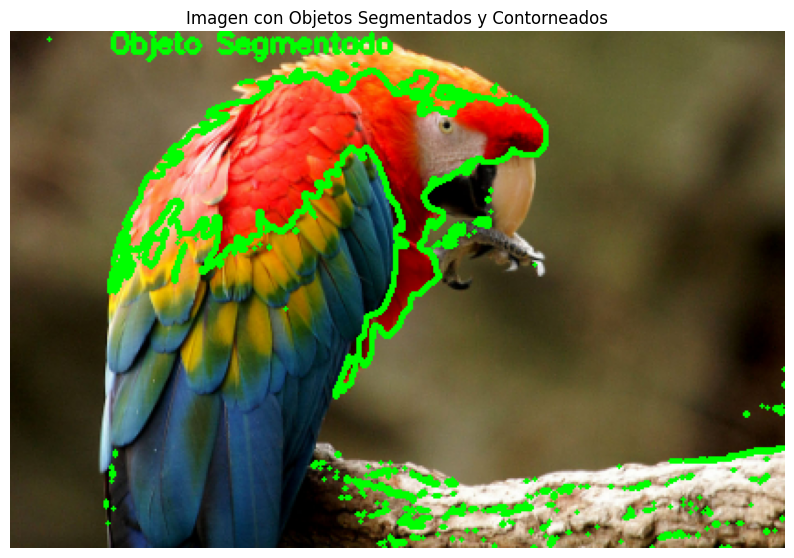

In [ ]:
# Creamos una copia de la imagen para dibujar sobre ella
imagen_con_contornos = imagen_rgb.copy()

# Encontramos los contornos en la máscara
mask_copy = mask.copy()
contours, _ = cv2.findContours(mask_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 1. Dibujar los contornos en la imagen
# El parámetro '-1' dibuja todos los contornos encontrados
# El color es verde (0, 255, 0) y el grosor es de 2 píxeles
cv2.drawContours(imagen_con_contornos, contours, -1, (0, 255, 0), 2)

# 2. Escribir el texto
for contour in contours:
    if cv2.contourArea(contour) > 500:
        # Obtener las coordenadas del rectángulo delimitador para referencia de posición
        x, y, w, h = cv2.boundingRect(contour)

        # Mover el texto a una posición más alta, fuera del contorno
        text_position = (x, y - 10)  # Ajusta este valor si es necesario

        # Dibujar el contorno
        cv2.drawContours(imagen_con_contornos, [contour], -1, (0, 255, 0), 2)

        # Agregar texto
        cv2.putText(imagen_con_contornos, 'Objeto Segmentado', text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 3. Mostrar el resultado final
plt.figure(figsize=(10, 8))
plt.imshow(imagen_con_contornos)
plt.title('Imagen con Objetos Segmentados y Contorneados')
plt.axis('off')
plt.show()

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución